In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [101]:
from scipy.stats import ttest_ind as ttest_ind, shapiro as shapiro

In [22]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6.75 # figure size in inches

In [6]:
path = 'https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv'

In [7]:
df = pd.read_csv(path)

In [8]:
df.head(5)

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [8]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [9]:
df.describe()

,order_id,delivery_time
count,20196.000000,20196.000000
mean,11103.503565,42.054169
std,5835.424404,10.382196
min,1000.000000,10.000000
25%,6048.750000,35.000000
50%,11109.500000,42.000000
75%,16158.250000,49.000000
max,21207.000000,83.000000


In [10]:
df.isna().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

In [16]:
df.experiment_group.value_counts()

test       10104
control    10092
Name: experiment_group, dtype: int64

In [74]:
df_control = df[df.experiment_group == 'control'] # КГ
df_test = df[df.experiment_group == 'test']  #ЦГ

In [75]:
df_control_sd   = np.std(df_control.delivery_time)
df_control_mean = np.mean(df_control.delivery_time)

df_test_sd   = np.std(df_test.delivery_time) 
df_test_mean = np.mean(df_test.delivery_time)

### Проверка на нормальность

#### • тест Шапиро-Уилка

**H0 - распределение нормальное**

In [112]:
# для теста Шапиро-Уилка рекоменд. исп. выборки; random_state=17 >>> ГСЧ
df_control_s = df_control.sample(1000, random_state=17)
df_test_s = df_test.sample(1000, random_state=17)

In [115]:
shapiro(df_control_s.delivery_time), shapiro(df_test_s.delivery_time)

((0.9974725842475891, 0.12411931157112122),
 (0.9975479245185852, 0.14013493061065674))

***pvalue = 0.12 и 0.14 >>> вероятности, что выборки распределены нормально***

In [104]:
df_test_sd, df_control_sd

(9.882819260031342, 9.989522000652327)

#### • визуальная оценка

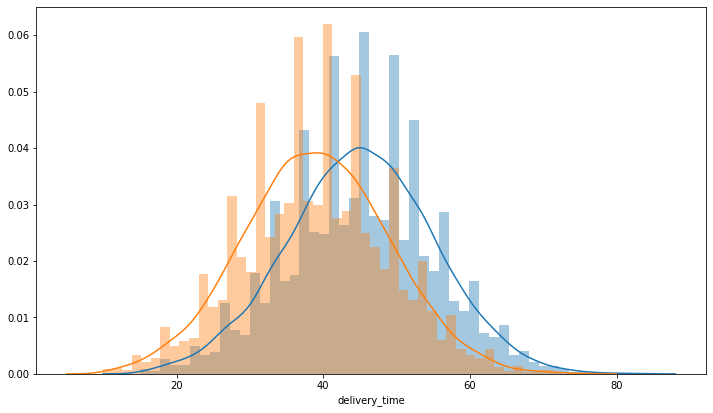

In [111]:
sns.distplot(df_control.delivery_time),
sns.distplot(df_test.delivery_time)

### Сравнение 2-ух выборок

#### • тест Стьюдента

**H0 - различия между выборками случайны**

In [107]:
ttest_ind(df_control.delivery_time, df_test.delivery_time) # t-test для независимых (independent) выборок

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

***pvalue = 0.0 >>> вероятность, что отличия между выборками случайны***

In [106]:
df_test_mean/df_control_mean - 1

-0.1335465312166081